In [22]:
# Create Latitude and Longitude Combinations

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime



In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# 6.1.5 Generate Random World Cities
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [26]:
############################################ 6.2.6 Get the City Weather Data ############################################
# Import your Requests Library and the weather_api_key
from config import weather_api_key
import requests

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | birao
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | ahipara
Processing Record 10 of Set 1 | la rioja
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | karasjok
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | santa isabel do rio negro
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | jubb jannin
City not found. Skipping...
Processing Record 39 of Set 4 | srednekolymsk
Processing Record 40 of Set 4 | saint-joseph
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | irbit
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | qaqortoq
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | saint-raymond
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | alugan
Processing Record 50 of Set 4 | cap-haitien
Processing Record 1 of Set 5 | los amates
Processing Record 2 of Set 5 | maracacume
Processing Record 3 of Set 5 | saint-jovite
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | unai
Processing Record 6 of Set 5 | kota belud
Processing Record 7 of Set 5 | aflu
City not found. Skipping...
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | moose factory
Processing Record 10 of Set

Processing Record 29 of Set 8 | kawalu
Processing Record 30 of Set 8 | yenagoa
Processing Record 31 of Set 8 | uvira
Processing Record 32 of Set 8 | aranjuez
Processing Record 33 of Set 8 | zhigansk
Processing Record 34 of Set 8 | jaffna
Processing Record 35 of Set 8 | fairbanks
Processing Record 36 of Set 8 | sayyan
Processing Record 37 of Set 8 | amahai
Processing Record 38 of Set 8 | moline
Processing Record 39 of Set 8 | puerto leguizamo
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | straumen
Processing Record 42 of Set 8 | trincomalee
Processing Record 43 of Set 8 | kang
Processing Record 44 of Set 8 | porto belo
Processing Record 45 of Set 8 | atambua
Processing Record 46 of Set 8 | kushiro
Processing Record 47 of Set 8 | mount isa
Processing Record 48 of Set 8 | bengkulu
Processing Record 49 of Set 8 | tyumentsevo
Processing Record 50 of Set 8 | kuching
Processing Record 1 of Set 9 | san patricio
Processing Record 2 of Set 9 | camrose
Processing Record 3 o

Processing Record 17 of Set 12 | westport
Processing Record 18 of Set 12 | hellvik
Processing Record 19 of Set 12 | playa del carmen
Processing Record 20 of Set 12 | neijiang
Processing Record 21 of Set 12 | aloleng
Processing Record 22 of Set 12 | koster
Processing Record 23 of Set 12 | burica
City not found. Skipping...
Processing Record 24 of Set 12 | plettenberg bay
Processing Record 25 of Set 12 | vila do maio
Processing Record 26 of Set 12 | mbumi
Processing Record 27 of Set 12 | marshall
Processing Record 28 of Set 12 | taketa
Processing Record 29 of Set 12 | casablanca
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | vestmannaeyjar
Processing Record 32 of Set 12 | micheweni
Processing Record 33 of Set 12 | honningsvag
Processing Record 34 of Set 12 | mulege
Processing Record 35 of Set 12 | sinkat
City not found. Skipping...
Processing Record 36 of Set 12 | elizabeth city
Processing Record 37 of Set 12 | lake city
Processing Record 38 of

In [27]:
print(len(city_data))

547


In [28]:
#############################  6.2.7 - Create a DataFrame of City Weather Data  #############################
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,283.15,61,3,2.60,AU,2020-08-01 18:49:28
1,Albany,42.60,-73.97,305.93,36,90,0.45,US,2020-08-01 18:50:20
2,Birao,10.28,22.79,295.42,91,100,2.67,CF,2020-08-01 18:51:05
3,East London,-33.02,27.91,289.71,69,0,2.52,ZA,2020-08-01 18:51:18
4,Ribeira Grande,38.52,-28.70,297.15,64,40,3.10,PT,2020-08-01 18:51:18
5,Butaritari,3.07,172.79,301.63,78,9,6.57,KI,2020-08-01 18:51:18
6,Castro,-24.79,-50.01,292.51,56,0,2.17,BR,2020-08-01 18:51:19
7,Hilo,19.73,-155.09,296.15,88,90,3.10,US,2020-08-01 18:47:46
8,Ahipara,-35.17,173.17,286.32,90,100,6.28,NZ,2020-08-01 18:51:19
9,La Rioja,42.25,-2.50,297.15,60,20,5.70,ES,2020-08-01 18:49:18


In [29]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-08-01 18:49:28,-42.88,147.33,283.15,61,3,2.60
1,Albany,US,2020-08-01 18:50:20,42.60,-73.97,305.93,36,90,0.45
2,Birao,CF,2020-08-01 18:51:05,10.28,22.79,295.42,91,100,2.67
3,East London,ZA,2020-08-01 18:51:18,-33.02,27.91,289.71,69,0,2.52
4,Ribeira Grande,PT,2020-08-01 18:51:18,38.52,-28.70,297.15,64,40,3.10
5,Butaritari,KI,2020-08-01 18:51:18,3.07,172.79,301.63,78,9,6.57
6,Castro,BR,2020-08-01 18:51:19,-24.79,-50.01,292.51,56,0,2.17
7,Hilo,US,2020-08-01 18:47:46,19.73,-155.09,296.15,88,90,3.10
8,Ahipara,NZ,2020-08-01 18:51:19,-35.17,173.17,286.32,90,100,6.28
9,La Rioja,ES,2020-08-01 18:49:18,42.25,-2.50,297.15,60,20,5.70


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

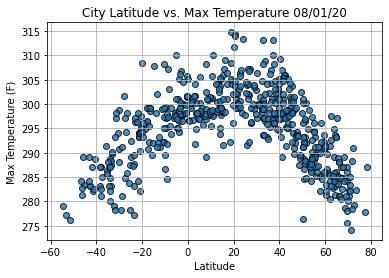

In [32]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

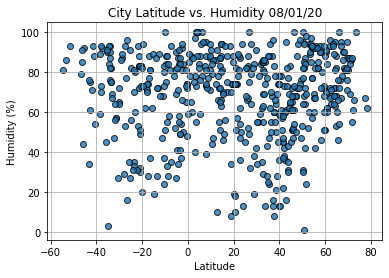

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

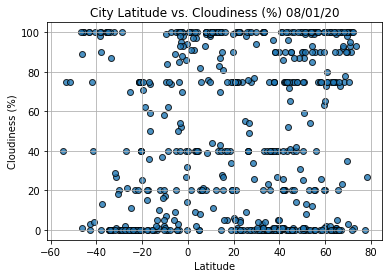

In [34]:
#############################  6.3.3 - Plot Latitude vs. Cloudiness  #############################  

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


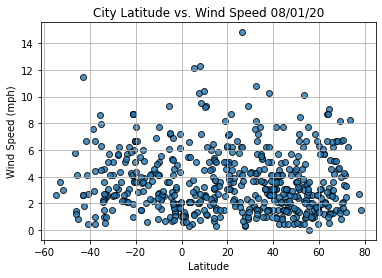

In [35]:
#############################  6.3.4 - Plot Latitude vs. Wind Speed  #############################  
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [65]:
##########################  6.4.2 - Find the Correlation Between Latitude and Maximum Temperature  ##########################
# Create a Linear Regression Function

from scipy.stats import linregress
import matplotlib.pyplot as plt

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [37]:
# Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13

City                     Karasjok
Country                        NO
Date          2020-08-01 18:51:19
Lat                         69.47
Lng                         25.51
Max Temp                   284.15
Humidity                       76
Cloudiness                     98
Wind Speed                    6.7
Name: 13, dtype: object

In [38]:
# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
542    False
543    False
544     True
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [39]:
# for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2020-08-01 18:50:20,42.60,-73.97,305.93,36,90,0.45
2,Birao,CF,2020-08-01 18:51:05,10.28,22.79,295.42,91,100,2.67
4,Ribeira Grande,PT,2020-08-01 18:51:18,38.52,-28.70,297.15,64,40,3.10
5,Butaritari,KI,2020-08-01 18:51:18,3.07,172.79,301.63,78,9,6.57
7,Hilo,US,2020-08-01 18:47:46,19.73,-155.09,296.15,88,90,3.10


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

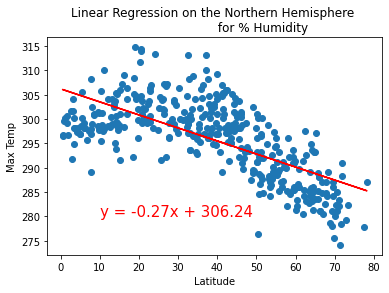

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', 'Max Temp',(10,280))

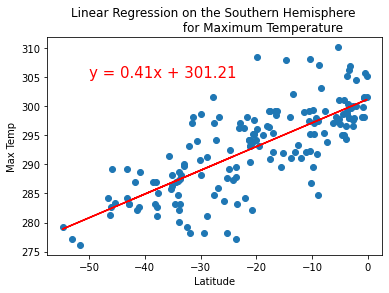

In [68]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Maximum Temperature', 'Max Temp',(-50,305))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less 
# than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means
# that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the 
# temperatures become cooler. Check the r-values for your plots. 

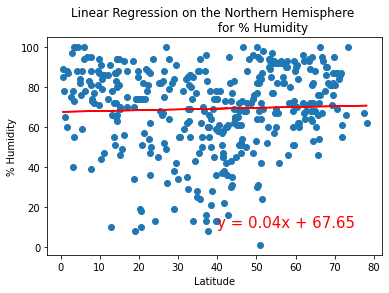

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', '% Humidity',(40,10))

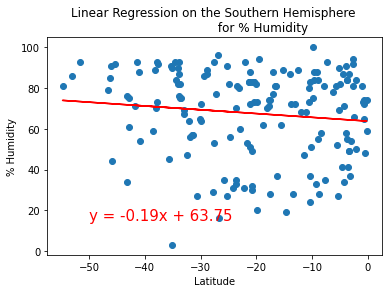

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern 
# and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather 
# patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

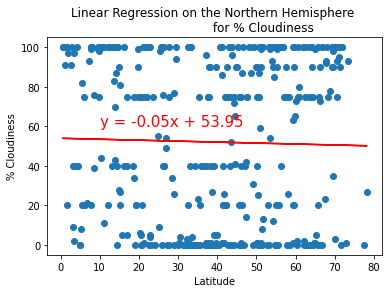

In [74]:
#######################  6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness ####################### 
# SKILL DRILL - Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(10,60))


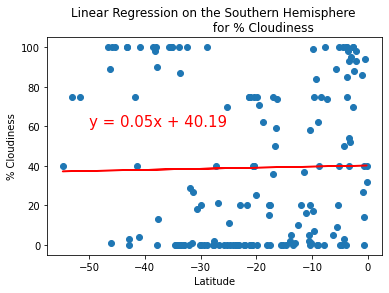

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-50,60))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the 
# Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is 
# unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your 
# plots. 

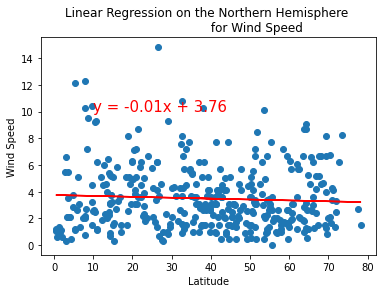

In [78]:
#######################  6.4.5 - Find the Correlation Between Latitude and Wind Speed #######################  

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(10,10))


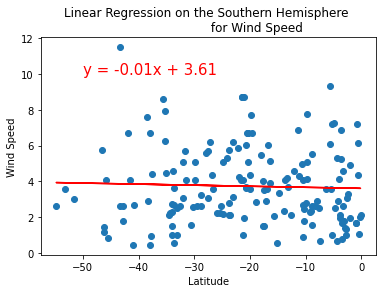

In [80]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,10))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern 
# Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is 
# unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 